Clasificador.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/15jNXFmJL4vlkKxQLCfzUEqbQbTTj2EX_

Integrantes:
<br>
**Andres Betancourt**
<br>
**Juan Herrera**
<br>
**Luis Bonilla**
<br>
**Sergio Aldana**






Instalamos la biblioteca

importamos librerias

In [2]:
import pandas as pandas 
import matplotlib.pyplot as pyplot

importamos los datos

In [3]:
datos = pandas.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSVsoWEv4o5xFOP2YzSVKQF-qlzu3FjIQPJEHFuIMyxxzb8_zHigMMx_H8G6uB7DbeoVnoK91gOy87W/pub?output=csv')
datos

,age,year_operation,nodes_detected,over_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [4]:
entradas = datos[["age","year_operation","nodes_detected"]] # Entradas
salida = datos["over_5_years"] # Salida

In [5]:
# Importamos la nueva libreria (train_test_split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    entradas, salida, test_size = 0.2, random_state = 0)

In [6]:
# Sacamos la cantidad de datos
X_train, X_validate, y_train, y_validate = train_test_split(
    X_train, y_train, test_size = 0.25, random_state = 0)

In [7]:
# Importamos la nueva libreria (DecisionTreeClassifier)
from sklearn.tree import DecisionTreeClassifier

arbol_decision = DecisionTreeClassifier(criterion='entropy')
arbol_decision.fit(X_train,y_train)
arbol_decision.feature_importances_

array([0.43130811, 0.23005641, 0.33863548])

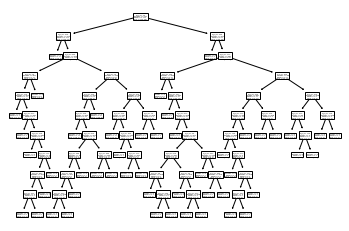

In [9]:
# Importamos la nueva libreria (tree)
from sklearn import tree
tree.plot_tree(arbol_decision)
pyplot.show()


In [10]:
# Importamos la nueva libreria (sklearn.naive_bayes) para utilizar naive_bayes
import sklearn.naive_bayes
naives = sklearn.naive_bayes.GaussianNB()
naives.fit(X_train,y_train)


print('Numero de datos por clase:', naives.class_count_)
print('Media de los datos:', naives.theta_)
print('Desviación estandar:', naives.var_)
datos[:306]

Numero de datos por clase: [145.  38.]
Media de los datos: [[52.56551724 63.16551724  3.05517241]
 [54.02631579 62.81578947  9.60526316]]
Desviación estandar: [[111.34915587  10.5795007   41.9693699 ]
 [ 87.07825495  12.20290869 127.50207767]]


,age,year_operation,nodes_detected,over_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [12]:
import numpy as numpy
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [13]:
def resultados(clasificacion, X_prueba, y_prueba, encabezado):
    print (encabezado)
    print('Promedio de la exactitud sobre la prueba')
    print(clasificacion.score(X_prueba, y_prueba))

    y_estimado = clasificacion.predict(X_prueba)
    print('Matrix de confusion')
    matrix = confusion_matrix( y_prueba,y_estimado)
    print(matrix)
    print(classification_report(y_prueba, y_estimado))
    resultado = ConfusionMatrixDisplay(confusion_matrix = matrix)
    resultado.plot()
    

Naives-Bayes
Promedio de la exactitud sobre la prueba
0.7049180327868853
Matrix de confusion
[[42  1]
 [17  1]]
              precision    recall  f1-score   support

           1       0.71      0.98      0.82        43
           2       0.50      0.06      0.10        18

    accuracy                           0.70        61
   macro avg       0.61      0.52      0.46        61
weighted avg       0.65      0.70      0.61        61



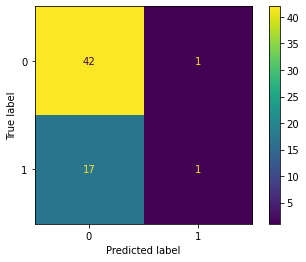

In [14]:
# Se muestran los resultados de la validacion de los datos de naives
resultados(naives, X_validate, y_validate, 'Naives-Bayes')


Decision-Tree
Promedio de la exactitud sobre la prueba
0.6885245901639344
Matrix de confusion
[[35  8]
 [11  7]]
              precision    recall  f1-score   support

           1       0.76      0.81      0.79        43
           2       0.47      0.39      0.42        18

    accuracy                           0.69        61
   macro avg       0.61      0.60      0.61        61
weighted avg       0.67      0.69      0.68        61



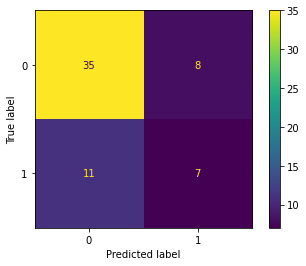

In [15]:
# Se muestran los datos de validacion de arbol_decision
resultados(arbol_decision, X_validate, y_validate, 'Decision-Tree')


Decision-Tree
Promedio de la exactitud sobre la prueba
0.6290322580645161
Matrix de confusion
[[30  7]
 [16  9]]
              precision    recall  f1-score   support

           1       0.65      0.81      0.72        37
           2       0.56      0.36      0.44        25

    accuracy                           0.63        62
   macro avg       0.61      0.59      0.58        62
weighted avg       0.62      0.63      0.61        62



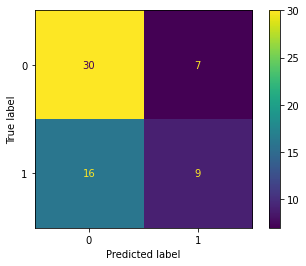

In [16]:
# Se muestran los datos del test 
resultados(arbol_decision, X_test, y_test, 'Decision-Tree')


Naives-Bayes
Promedio de la exactitud sobre la prueba
0.6290322580645161
Matrix de confusion
[[30  7]
 [16  9]]
              precision    recall  f1-score   support

           1       0.65      0.81      0.72        37
           2       0.56      0.36      0.44        25

    accuracy                           0.63        62
   macro avg       0.61      0.59      0.58        62
weighted avg       0.62      0.63      0.61        62



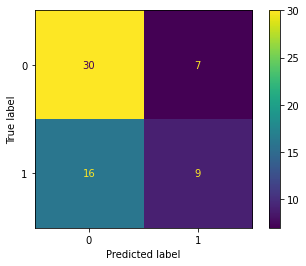

In [17]:
# Se muestran los datos de de test 
resultados(arbol_decision, X_test, y_test, 'Naives-Bayes')
